In [2]:
#-----------------------------------------------------------------------
# Modules for import
#-----------------------------------------------------------------------
import matplotlib.pyplot as plt  
import pandas as pd 
import hb_functions as hb
from sqlalchemy import create_engine
import sys
import seaborn as sns
import numpy as np
import itertools
sns.set_style("whitegrid")
#sns.set_style("whitegrid", {'axes.grid' : False})

%matplotlib inline

In [3]:

'''
#-----------------------------------------------------------------------
#Define database
#-----------------------------------------------------------------------
'''
haushaltsbuch_db = create_engine('sqlite:////Users/Potzenhotz/data/database/haushaltsbuch.db')

In [9]:
'''
-----------------------------------------------------------------------
 CORE: Read table
-----------------------------------------------------------------------
'''
var_jahr = '2017'
var_monat = '4'
print('Start reading tables')
mart_sql_query = 'select * from dm_ausgaben;' 
loaded_dm_ausgaben = hb.read_sql(haushaltsbuch_db, mart_sql_query)
#loaded_dm_ausgaben.set_index('index', inplace=True)
loaded_dm_ausgaben["Zeit"] = loaded_dm_ausgaben["Jahr"].map(str) + '/' + loaded_dm_ausgaben["Monat"].map(str)
loaded_dm_ausgaben.set_index('Zeit', inplace=True)
#print(loaded_dm_ausgaben) 
loaded_dm_ausgaben = loaded_dm_ausgaben.drop('Jahr', 1)
loaded_dm_ausgaben = loaded_dm_ausgaben.drop('Monat', 1)
loaded_dm_ausgaben = loaded_dm_ausgaben.drop('index', 1)
loaded_dm_ausgaben = loaded_dm_ausgaben.drop(['0/0'])
#loaded_dm_ausgaben = loaded_dm_ausgaben.replace('0', np.nan)
print(loaded_dm_ausgaben)

Start reading tables
         Konsum   Essen  Haushalt  Bargeld    Auto  Kreditkarte   Firma  \
Zeit                                                                      
2016/7   117.85    0.00   1015.34    350.0    0.00        10.97     0.0   
2016/8   857.37  222.05    688.29    900.0  128.36        48.99     0.0   
2016/9   481.22   34.51     54.17    750.0   30.85      1363.72    66.0   
2016/10  266.44  207.76    585.91    600.0   68.69      1619.95     0.0   
2016/11  517.96  154.05    751.68    700.0   84.55      1659.69     0.0   
2016/12  752.10  103.03    653.01    750.0  617.10      1719.90     0.0   
2017/1   159.86  125.03    646.98    150.0  211.35         0.00   586.3   
2017/2   222.95  124.74    628.18    300.0   37.44         0.00  1015.0   
2017/3   434.72   63.44    599.86    350.0   43.76         1.99   764.4   
2017/4   205.89   57.70    585.52    250.0   63.76       421.06   814.4   
2017/5   406.73   85.10    588.74   2304.5  125.34         4.08   821.4   
2017

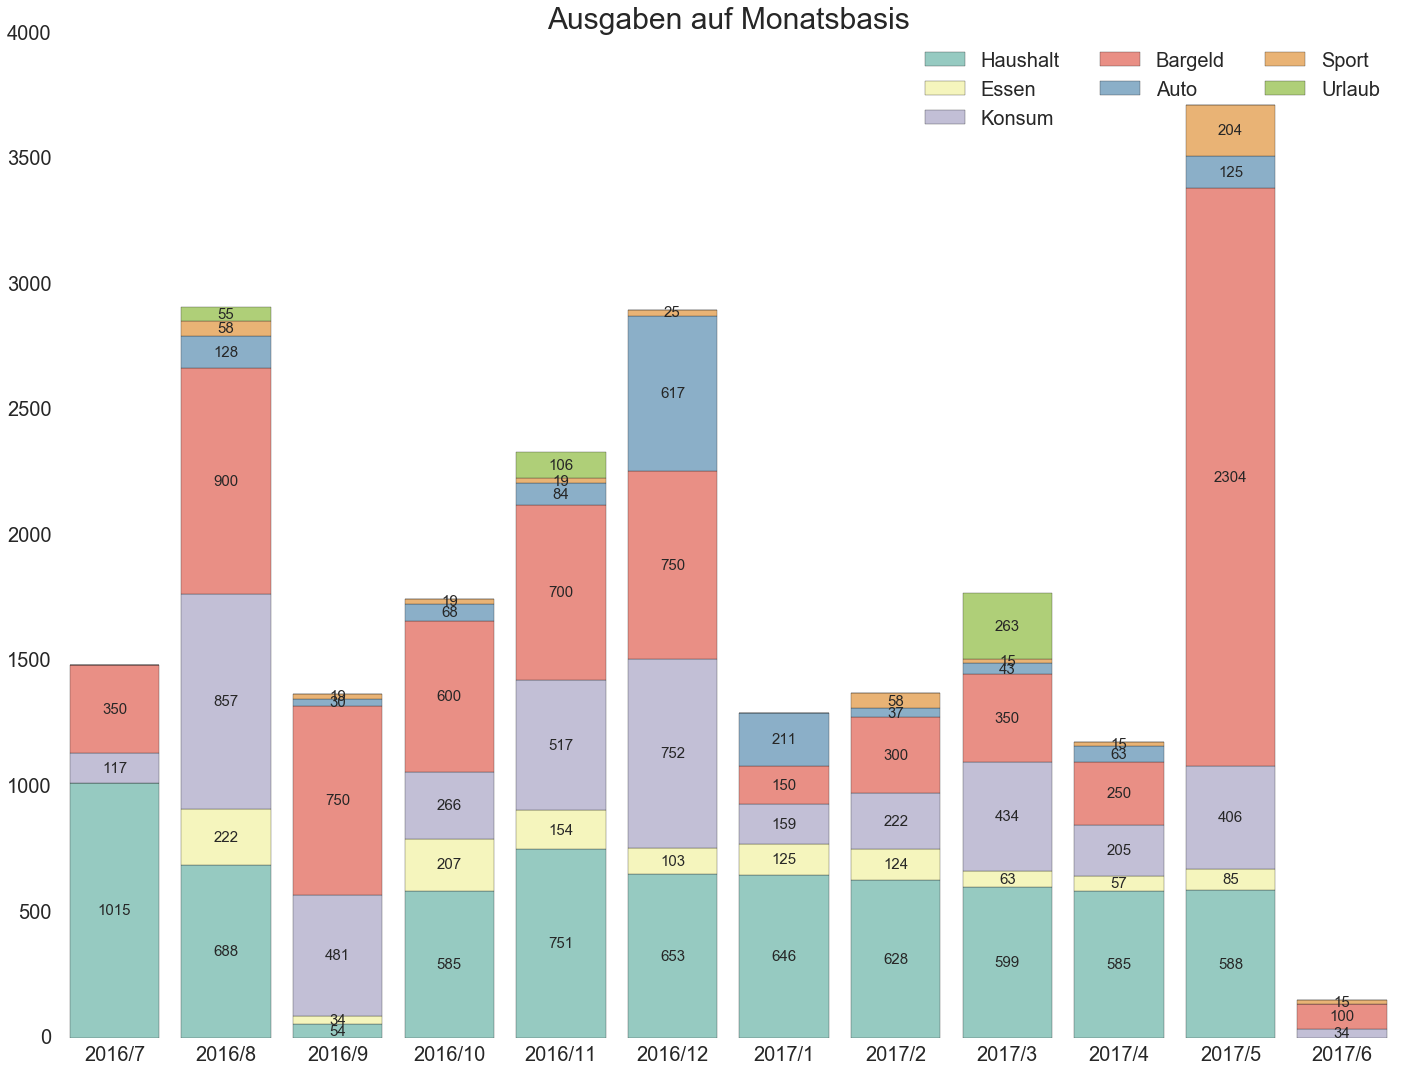

In [10]:
f, ax = plt.subplots(figsize=(24, 18))

#sns.set(font_scale=3.5)


# Plot the total crashes
sns.set_color_codes("pastel")
#sns.palplot(sns.color_palette("Set2", 10))
#sns.color_palette("muted")
palette = itertools.cycle(sns.color_palette("hls", 8))
palette = itertools.cycle(sns.color_palette("Set2", 8))
palette = itertools.cycle(sns.color_palette("Set3", 8))

index = loaded_dm_ausgaben.index
cn1 = 'Haushalt'
cn2 = 'Essen'
cn3 = 'Konsum'
cn4 = 'Bargeld'
cn5 = 'Auto'
cn6 = 'Sport'
cn7 = 'Urlaub'
c1 = loaded_dm_ausgaben[cn1]
c2 = loaded_dm_ausgaben[cn2]
c3 = loaded_dm_ausgaben[cn3]
c4 = loaded_dm_ausgaben[cn4]
c5 = loaded_dm_ausgaben[cn5]
c6 = loaded_dm_ausgaben[cn6]
c7 = loaded_dm_ausgaben[cn7]
sns_plot = sns.barplot(x=index, y=c1, label=cn1, color=next(palette))
sns_plot = sns.barplot(x=index, y=c2, label=cn2, color=next(palette), bottom=c1 )
sns_plot = sns.barplot(x=index, y=c3, label=cn3, color=next(palette), bottom=c1+c2 )
sns_plot = sns.barplot(x=index, y=c4, label=cn4, color=next(palette), bottom=c1+c2+c3 )
sns_plot = sns.barplot(x=index, y=c5, label=cn5, color=next(palette), bottom=c1+c2+c3+c4 )
sns_plot = sns.barplot(x=index, y=c6, label=cn6, color=next(palette), bottom=c1+c2+c3+c4+c5)
sns_plot = sns.barplot(x=index, y=c7, label=cn7, color=next(palette), bottom=c1+c2+c3+c4+c5+c6)
#loaded_dm_ausgaben.plot(kind='bar', stacked=True)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    if height == 0:
        continue
    #print(width)
    #print(height)
    #print(p.get_x())
    #print(p.get_y())
    ax.text(p.get_x()+width/2,
            p.get_y()+height/2,
            int(height)
           , ha='center'
           , va='center'
           , fontsize=15) 
#print(ax.patches)

# Turn off tick labels
#ax.set_xticklabels([])
# Turns off grid on the left Axis.
ax.grid(False)

#ax.set_yticks(list(range(100,5000,100)))
#ax.set_yticklabels(list(range(0,5000,500)))
# Add a legend and infoormative axis label
ax.legend(ncol=3, loc="upper right", frameon=False, fontsize=20)
ax.set(ylabel="", xlabel="")
sns.despine(left=True, bottom=True)
ax.set_title('Ausgaben auf Monatsbasis', fontsize=30)
ax.tick_params(labelsize=20)
fig1 = plt.gcf()

In [6]:
#plt.savefig("/Users/Potzenhotz/data/final_data/hb_plot.png", bbox_inches="tight")  
plot_name = 'monthly_expenses'
plot_full_name = "/Users/Potzenhotz/data/final_data/" + plot_name + ".png"
plot_full_name_2 = "/Users/Potzenhotz/Dropbox/haushaltsbuch/" + plot_name + ".png"
fig1.savefig(plot_full_name)  
fig1.savefig(plot_full_name_2)  